In [3]:
from models import *
from initializers import *
import models
import importlib
importlib.reload(models)

def train_momentum(model, epoch_counts, learning_rates, lambdas, report_interval=100, batch_size=None, save_till_best=False):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="momentum",
                    momentum_lambda=lambdas[i],
                    report_interval=report_interval,
                    batch_size=batch_size,
                    save_till_best=save_till_best)
    model.plot()

def train_rmsprop(model, epoch_counts, learning_rates, rms_beta, report_interval=100, batch_size=None, save_till_best=False):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="rmsprop",
                    rms_beta=rms_beta,
                    report_interval=report_interval,
                    batch_size=batch_size,
                    save_till_best=save_till_best)
    model.plot()

## SGD with momentum

Model age: 10	MSE on train set: 279.99	MSE on test set: 272.39
Model age: 20	MSE on train set: 150.91	MSE on test set: 149.24
Model age: 30	MSE on train set: 84.48	MSE on test set: 83.29
Model age: 40	MSE on train set: 81.63	MSE on test set: 72.5
--------------------
Reverting to best model at age 38
Best model MSE: 64.75
--------------------
Model age: 48	MSE on train set: 58.72	MSE on test set: 52.95
Model age: 58	MSE on train set: 62.03	MSE on test set: 72.58
Model age: 68	MSE on train set: 58.46	MSE on test set: 46.06
Model age: 78	MSE on train set: 54.7	MSE on test set: 45.92
Model age: 88	MSE on train set: 37.3	MSE on test set: 24.73
--------------------
Reverting to best model at age 88
Best model MSE: 24.73
--------------------
Model age: 98	MSE on train set: 57.41	MSE on test set: 43.48
Model age: 108	MSE on train set: 26.0	MSE on test set: 22.14
Model age: 118	MSE on train set: 47.93	MSE on test set: 60.47
Model age: 128	MSE on train set: 31.92	MSE on test set: 26.08
Model ag

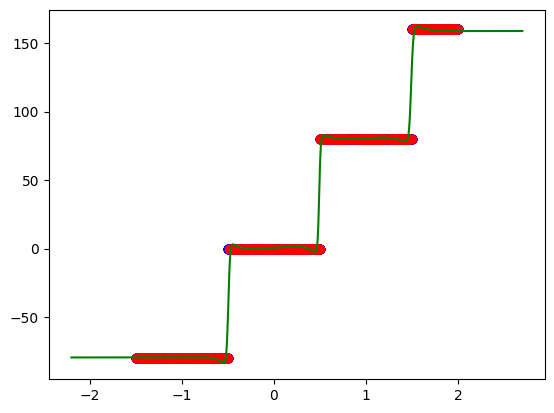

In [6]:
dataset_name = "steps-large"
arch = MLPArchitecture(1, [10, 10], 1)
model_momentum = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierNormalInitializer())

epoch_counts = [40, 50, 50, 50]
learning_rates = [0.1, 0.1, 0.08, 0.05]
lambdas = [0.3, 0.6, 0.6, 0.6]

train_momentum(model=model_momentum,
               epoch_counts=epoch_counts,
               learning_rates=learning_rates,
               lambdas=lambdas,
               report_interval=10,
               batch_size=1, 
               save_till_best=True)

### final evaluation

In [7]:
model_momentum.evaluate()

MSE on train set: 25.71	MSE on test set: 15.27


## Mini-batch with RMSprop

Model age: 10	MSE on train set: 174.54	MSE on test set: 185.13
Model age: 20	MSE on train set: 65.76	MSE on test set: 54.89
Model age: 30	MSE on train set: 226.91	MSE on test set: 239.78
Model age: 40	MSE on train set: 209.48	MSE on test set: 230.27
Model age: 50	MSE on train set: 114.6	MSE on test set: 101.97
Model age: 60	MSE on train set: 82.13	MSE on test set: 72.99
Model age: 70	MSE on train set: 65.3	MSE on test set: 71.62
Model age: 80	MSE on train set: 152.5	MSE on test set: 165.64
Model age: 90	MSE on train set: 66.88	MSE on test set: 95.47
Model age: 100	MSE on train set: 148.36	MSE on test set: 135.28
Model age: 110	MSE on train set: 300.24	MSE on test set: 319.31
Model age: 120	MSE on train set: 155.45	MSE on test set: 134.93
Model age: 130	MSE on train set: 67.8	MSE on test set: 39.01
Model age: 140	MSE on train set: 116.22	MSE on test set: 118.49
Model age: 150	MSE on train set: 136.85	MSE on test set: 102.56
Model age: 160	MSE on train set: 104.51	MSE on test set: 97.33


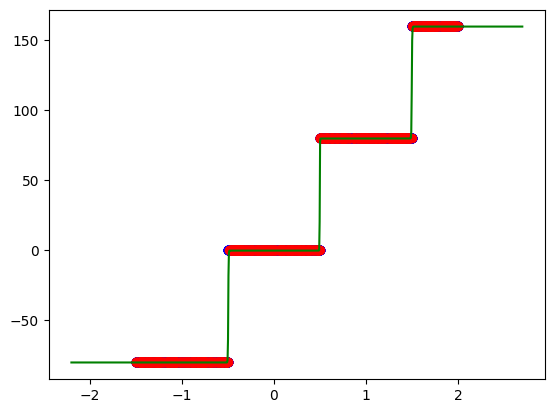

In [8]:
dataset_name = "steps-large"
arch = MLPArchitecture(1, [10, 10], 1)
model_rmsprop = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierNormalInitializer())

epoch_counts = [400, 500, 500, 500]
learning_rates = [0.1, 0.05, 0.01, 0.01]

train_rmsprop(model=model_rmsprop,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=100,
              save_till_best=True)

Model age: 1461	MSE on train set: 22.59	MSE on test set: 19.37
Model age: 1471	MSE on train set: 8.82	MSE on test set: 11.43
Model age: 1481	MSE on train set: 38.88	MSE on test set: 34.79
Model age: 1491	MSE on train set: 31.45	MSE on test set: 26.86
Model age: 1501	MSE on train set: 41.44	MSE on test set: 37.66
Model age: 1511	MSE on train set: 25.31	MSE on test set: 21.7
Model age: 1521	MSE on train set: 37.62	MSE on test set: 36.38
Model age: 1531	MSE on train set: 39.0	MSE on test set: 41.24
Model age: 1541	MSE on train set: 66.59	MSE on test set: 57.15
Model age: 1551	MSE on train set: 24.61	MSE on test set: 22.37
Model age: 1561	MSE on train set: 70.76	MSE on test set: 59.13
Model age: 1571	MSE on train set: 23.89	MSE on test set: 20.84
Model age: 1581	MSE on train set: 15.37	MSE on test set: 19.38
Model age: 1591	MSE on train set: 15.84	MSE on test set: 18.45
Model age: 1601	MSE on train set: 17.56	MSE on test set: 19.03
Model age: 1611	MSE on train set: 19.91	MSE on test set: 1

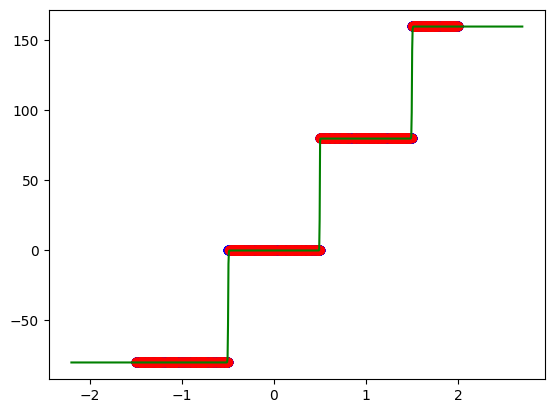

In [10]:
epoch_counts = [500, 500]
learning_rates = [0.05, 0.01]

train_rmsprop(model=model_rmsprop,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=100,
              save_till_best=True)

Model age: 1704	MSE on train set: 6.06	MSE on test set: 1.33
Model age: 1714	MSE on train set: 4.45	MSE on test set: 1.54
Model age: 1724	MSE on train set: 5.3	MSE on test set: 7.31
Model age: 1734	MSE on train set: 3.7	MSE on test set: 5.18
Model age: 1744	MSE on train set: 6.69	MSE on test set: 5.36
Model age: 1754	MSE on train set: 3.99	MSE on test set: 3.35
Model age: 1764	MSE on train set: 3.7	MSE on test set: 3.34
Model age: 1774	MSE on train set: 4.68	MSE on test set: 1.26
Model age: 1784	MSE on train set: 5.18	MSE on test set: 6.25
Model age: 1794	MSE on train set: 4.37	MSE on test set: 1.2
Model age: 1804	MSE on train set: 3.69	MSE on test set: 3.99
Model age: 1814	MSE on train set: 5.11	MSE on test set: 3.85
Model age: 1824	MSE on train set: 4.5	MSE on test set: 7.08
Model age: 1834	MSE on train set: 5.28	MSE on test set: 4.27
Model age: 1844	MSE on train set: 5.4	MSE on test set: 4.79
Model age: 1854	MSE on train set: 4.88	MSE on test set: 1.82
Model age: 1864	MSE on train s

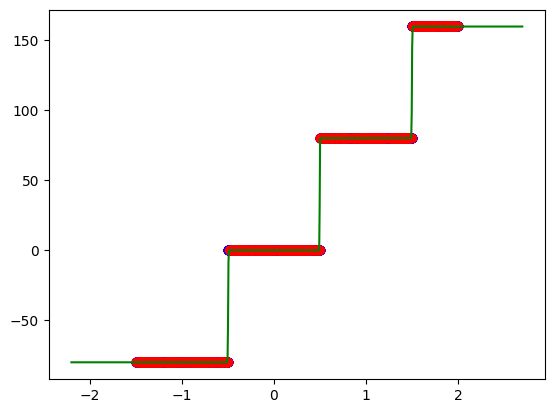

In [12]:
epoch_counts = [500, 500]
learning_rates = [0.01, 0.005]

train_rmsprop(model=model_rmsprop,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=100,
              save_till_best=True)

### final evaluation

In [13]:
model_rmsprop.evaluate()

MSE on train set: 5.88	MSE on test set: 0.7
